# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [359]:
#Starter Code

from bs4 import BeautifulSoup
import requests

url = 'https://www.azlyrics.com/m/ministry.html' #Put the URL of your AZLyrics Artist Page here!

def scrape_links(url):
    
    user_agent = user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    header = {'User-Agent': user_agent}
    html_page = requests.get(url, headers=header) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
    albums = soup.find_all("div", class_="album")
    

    #The example from our lecture/reading
    data = [] #Create a storage container
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data

In [360]:
url1 = 'https://www.azlyrics.com/m/ministry.html'
links = scrape_links(url1)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [361]:
links[0]

("Effigy (I'm Not An)",
 '../lyrics/ministry/effigyimnotan.html',
 'album: "With Symphathy" (1983)')

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [358]:
from bs4 import BeautifulSoup
import requests
url = 'https://www.azlyrics.com/lyrics/ministry/effigyimnotan.html'

page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
soup.prettify()[:1000]

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [127]:
divs = soup.findAll('div')
div = divs[0]

In [129]:
for n, div in enumerate(divs):
    if '<!-- Usage of aslyrics.com content by any' in div.text:
        print(n)

In [143]:
main_page = soup.find('div', {'class': 'container main-page'})
main_12 = main_page.find('div', {'class': 'row'})
main_13 = main_12.find('div', {'class': 'col-xs-12 col-lg-8 text-center'})
lyrics = main_13.findAll('div')[6].text

In [145]:
lyrics[:50]

'\n\r\nYou are the only person I know\nBut I take you r'

In [355]:
url = 'https://www.azlyrics.com/lyrics/ministry/effigyimnotan.html'
def scrape_lyrics(url):
    user_agent = user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    header = {'User-Agent': user_agent}
    html_page = requests.get(url, headers=header)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {'class':'container main-page'})
    main2 = main_page.find('div',{'class':'row'})
    main3 = main2.find('div', {'class': 'col-xs-12 col-lg-8 text-center'})
    lyrics = main3.findAll('div')[6].text
    return lyrics

# lyrics = scrape_lyrics(url)
# print(lyrics[:100])

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [356]:
import time
def scrape_all_songs(url):
    links = scrape_links(url)
    songs = []
    for link in links:
        try:
            url2 = 'https://www.azlyrics.com'+link[1].replace('..','')
            songs.append({'title':link[0],'album':link[2], 'lyrics':scrape_lyrics(url2)})
            time.sleep(2)
        except:
            songs.append('N/A')
    return songs

In [251]:
songs = scrape_all_songs(url1)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [357]:
songs2 = scrape_all_songs(url1)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [177]:
songs[:4]

[{'title': "Effigy (I'm Not An)",
  'album': 'album: "With Symphathy" (1983)',
  'lyrics': ["\n\r\nYou are the only person I know\nBut I take you round to people who are on the go\nWell you took me to a picture show\nAnd what's the first thing I see\nBut them burning pictures of my head to toe, hey!\n\nI'm not an effigy, no, no!\n\nI asked you if you would be mad\nIf I packed my things and moved away to faraway land\nWell I packed my things and I moved to this place\nAnd what's the first thing I see\nBut them burning pictures of me in my face, hey!\n\nI'm not an effigy, no, no!\n\nWell I moved back from this faraway land\nWalked right into a room with me mum and me dad\nWell I saw my picture hanging on the wall\nThey tried to rip it and burn it\nBut it just withstood it all and I said hey!\n\nI'm not an effigy\n\nI'm not angry\nI'm not an effigy... hey!\n\nWell walking around this stinking town\nI look up at the buildings and they get me down\nWell I look to my left and then I look to 

In [180]:
type(songs)

list

In [187]:
songs[0]

{'title': "Effigy (I'm Not An)",
 'album': 'album: "With Symphathy" (1983)',
 'lyrics': ["\n\r\nYou are the only person I know\nBut I take you round to people who are on the go\nWell you took me to a picture show\nAnd what's the first thing I see\nBut them burning pictures of my head to toe, hey!\n\nI'm not an effigy, no, no!\n\nI asked you if you would be mad\nIf I packed my things and moved away to faraway land\nWell I packed my things and I moved to this place\nAnd what's the first thing I see\nBut them burning pictures of me in my face, hey!\n\nI'm not an effigy, no, no!\n\nWell I moved back from this faraway land\nWalked right into a room with me mum and me dad\nWell I saw my picture hanging on the wall\nThey tried to rip it and burn it\nBut it just withstood it all and I said hey!\n\nI'm not an effigy\n\nI'm not angry\nI'm not an effigy... hey!\n\nWell walking around this stinking town\nI look up at the buildings and they get me down\nWell I look to my left and then I look to my 

In [402]:
import pandas as pd

df = pd.DataFrame()
for song in songs:
    if song =='N/A':
        songs.remove(song)
    else:
        df2 = pd.DataFrame(song)
        df = pd.concat([df, df2], ignore_index=True)
        
df.head()

,title,album,lyrics
0,Effigy (I'm Not An),"album: ""With Symphathy"" (1983)",\n\r\nYou are the only person I know\nBut I ta...
1,Revenge,"album: ""With Symphathy"" (1983)",\n\r\nPushed me off the dirty floor\nYou watch...
2,I Wanted To Tell Her,"album: ""With Symphathy"" (1983)",\n\r\nI wanted to tell her but I stuck to my l...
3,Work For Love,"album: ""With Symphathy"" (1983)",\n\r\nHey!\n\nYou said you needed full time he...
4,Here We Go,"album: ""With Symphathy"" (1983)",\n\r\nThis one's fought the trendy set\nThis o...


In [403]:
df.title.value_counts().head()

Jesus Built My Hotrod    5
All Day                  3
Isle Of Man              2
Waiting                  1
TV III                   1
Name: title, dtype: int64

In [404]:
df[(df['title']== 'Isle Of Man')|(df['title']== 'Jesus Built My Hotrod')|(df['title'] =='All Day')]

,title,album,lyrics
11,All Day,"album: ""Twitch"" (1986)",\n\r\nWell I'm hiding my eyes from the morning...
15,Isle Of Man,"album: ""Twitch"" (1986)",\n\r\nNice place\nClean water\nFresh air\nBlue...
16,All Day,"album: ""Twitch"" (1986)",\n\r\nWell I'm hiding my eyes from the morning...
19,All Day,"album: ""Singles"" (1987)",\n\r\nWell I'm hiding my eyes from the morning...
22,Isle Of Man,"album: ""Singles"" (1987)",\n\r\nNice place\nClean water\nFresh air\nBlue...
25,Jesus Built My Hotrod,"album: ""Singles"" (1987)",\n\r\nSoon I discovered that this rock thing w...
27,Jesus Built My Hotrod,"album: ""Singles"" (1987)",\n\r\nSoon I discovered that this rock thing w...
35,Jesus Built My Hotrod,"album: ""The Land Of Rape And Honey"" (1988)",\n\r\nSoon I discovered that this rock thing w...
45,Jesus Built My Hotrod,"album: ""The Mind Is A Terrible Thing To Taste""...",\n\r\nSoon I discovered that this rock thing w...
50,Jesus Built My Hotrod,"album: ""Psalm 69: The Way To Succeed And The W...",\n\r\nSoon I discovered that this rock thing w...


In [405]:
df.drop_duplicates(inplace=True)

In [406]:
df['album'] = df['album'].map(lambda x: x.strip('album:')) #remove the initial "album:". Hopefully none of the actual names contain that!!
df.head() #Preview updated results

,title,album,lyrics
0,Effigy (I'm Not An),"""With Symphathy"" (1983)",\n\r\nYou are the only person I know\nBut I ta...
1,Revenge,"""With Symphathy"" (1983)",\n\r\nPushed me off the dirty floor\nYou watch...
2,I Wanted To Tell Her,"""With Symphathy"" (1983)",\n\r\nI wanted to tell her but I stuck to my l...
3,Work For Love,"""With Symphathy"" (1983)",\n\r\nHey!\n\nYou said you needed full time he...
4,Here We Go,"""With Symphathy"" (1983)",\n\r\nThis one's fought the trendy set\nThis o...


In [407]:
import re

def extract_year(album_title):
    try:
        return re.findall('[(](\d\d\d\d)[)]', album_title)[0]
    except:
        return 'Unknown'

In [408]:
df['year'] = df['album'].map(extract_year)
df.head()

,title,album,lyrics,year
0,Effigy (I'm Not An),"""With Symphathy"" (1983)",\n\r\nYou are the only person I know\nBut I ta...,1983
1,Revenge,"""With Symphathy"" (1983)",\n\r\nPushed me off the dirty floor\nYou watch...,1983
2,I Wanted To Tell Her,"""With Symphathy"" (1983)",\n\r\nI wanted to tell her but I stuck to my l...,1983
3,Work For Love,"""With Symphathy"" (1983)",\n\r\nHey!\n\nYou said you needed full time he...,1983
4,Here We Go,"""With Symphathy"" (1983)",\n\r\nThis one's fought the trendy set\nThis o...,1983


In [418]:
df['album'] = df['album'].map(lambda x: re.sub('[(\d\d\d\d)]', '', x).strip())
df.head()

,title,album,lyrics,year
0,Effigy (I'm Not An),"""With Symphathy""",\n\r\nYou are the only person I know\nBut I ta...,1983
1,Revenge,"""With Symphathy""",\n\r\nPushed me off the dirty floor\nYou watch...,1983
2,I Wanted To Tell Her,"""With Symphathy""",\n\r\nI wanted to tell her but I stuck to my l...,1983
3,Work For Love,"""With Symphathy""",\n\r\nHey!\n\nYou said you needed full time he...,1983
4,Here We Go,"""With Symphathy""",\n\r\nThis one's fought the trendy set\nThis o...,1983


In [431]:
df.title.unique()

array(["Effigy (I'm Not An)", 'Revenge', 'I Wanted To Tell Her',
       'Work For Love', 'Here We Go', 'What He Say', "Say You're Sorry",
       'Should Have Known Better', "She's Got A Cause", 'Just Like You',
       'We Believe', 'All Day', 'The Angel', 'Over The Shoulder',
       'My Possession', 'Isle Of Man', 'Cold Life', "I'm Falling",
       '(Everyday Is) Halloween', 'The Nature Of Love', 'Smothered Hope',
       'Tonight We Murder', 'Jesus Built My Hotrod', 'TV Song',
       'Stigmata', 'The Missing', 'Deity', 'The Land Of Rape And Honey',
       'You Know What You Are', 'I Prefer', 'Flashback', 'Thieves',
       'Burning Inside', 'Never Beleive', 'Cannibal Song', 'Breathe',
       'So What', 'Test', 'Faith Collapsing', 'Dream Song', 'N.W.O.',
       'Just One Fix', 'TV II', 'Hero', 'Scarecrow', 'Psalm 69', 'Reload',
       'Filth Pig', 'Lava', 'Crumbs', 'Useless', 'Dead Guy', 'Game Show',
       'The Fall', 'Lay Lady Lay', 'Brick Windows', 'Supermanic Soul',
       'Whip Or C

In [464]:
df.loc[df['title']=="N.W.O."]['lyrics']

46    \n\r\nAll the locals hide their tears of regre...
Name: lyrics, dtype: object

In [466]:
df.iloc[44]

title                                                N.W.O.
album     "Psalm : The Way To Succeed And The Way To Suc...
lyrics    \n\r\nAll the locals hide their tears of regre...
year                                                   1992
Name: 46, dtype: object

## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')



In [459]:
df[df['title'] == "We're Tired Of It"]['lyrics']

133    \n\r\nFake! Alternate false realities\nFucking...
Name: lyrics, dtype: object

In [463]:
pd.Series(df.lyrics.iloc[131].split()).value_counts()[:20]

is            7
lost!         5
Hope          5
the           5
to            3
us            3
and           2
lies!         2
for           2
your          2
He            2
comes         1
Alternate     1
system        1
hypnotized    1
Ignore        1
Liberty       1
ashes         1
Fuck          1
forced        1
dtype: int64

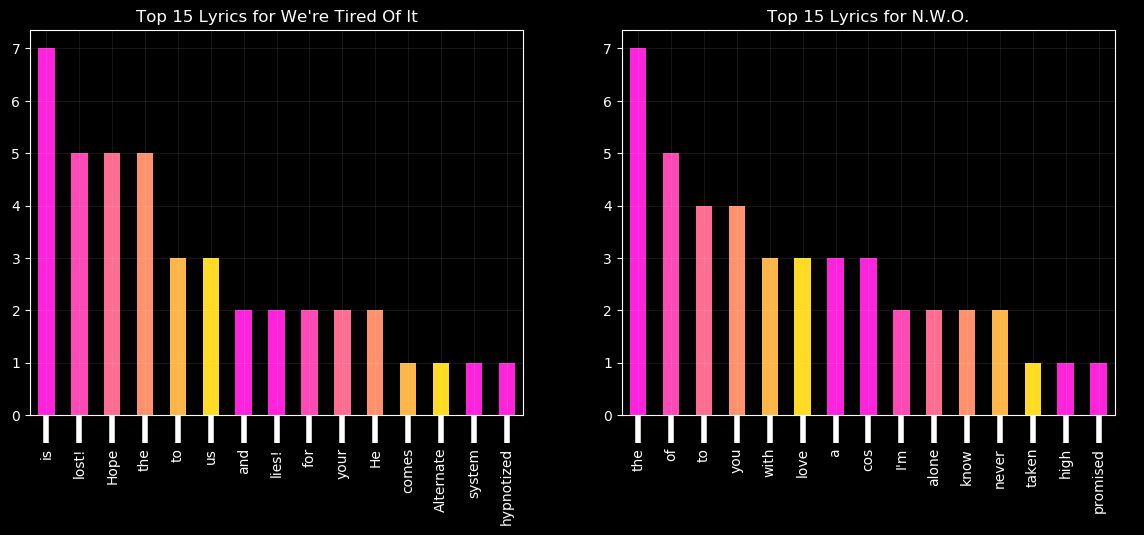

In [550]:
# plt.style.use('default')
sns.set_palette(palette='spring')

fig, axes = plt.subplots(1,2, figsize=(14,5))

top_15 = pd.Series(df.lyrics.iloc[131].split()).value_counts()[:15]
top_15.plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 15 Lyrics for {}'.format(df['title'].iloc[131]))
axes[0].grid(alpha=.09)
# axes[0].set_facecolor('grey')
top_15 = pd.Series(df.lyrics.iloc[44].split()).value_counts()[:15]
top_15.plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 15 Lyrics for {}'.format(df['title'].iloc[44]))
axes[1].grid(alpha=.09)
# axes[1].set_facecolor()


## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!